In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
import pandas as pd
#col_names = ['Idade', 'Sexo', 'Tipo de dor Peito', 'colesterol sérico', '']
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Modulo-1/Cardiacos/heart.csv')
dados.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#Contabiliza quantidade de dados
dados.shape

(303, 14)

In [ ]:
#Verificando tipos de variaveis
dados.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
#Contabilizando dados faltantes
faltantes = dados.isnull().sum() / len(dados['age']) * 100
print(faltantes)

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64


In [6]:
#Separando variaveis entre preditoras e target
y = dados['target']
x = dados.drop('target', axis = 1)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

#Separando os dados em folds
stratifiedkfold = StratifiedKFold(n_splits=5)

#Criando o modelo
modelo = LogisticRegression(max_iter=1000, solver='liblinear')
resultado = cross_val_score(modelo, x, y, cv=stratifiedkfold)

#Imprimindo a  media das acuracias
print(resultado.mean())

0.8215300546448088


In [8]:
#Melhorando parametros
import numpy as np
from sklearn.model_selection import GridSearchCV

#Definindo os valores que serao de testes em LogisticRegression
valores_C = np.array([0.3, 0.4, 0.5, 1, 2, 3, 5, 100, 1000])
regularizacao = ['l1', 'l2']
valores_grid = {'C': valores_C, 'penalty': regularizacao}

#Criação dos Grids
grid_regressao_logistica = GridSearchCV(estimator = modelo, param_grid = valores_grid, cv = 5)
grid_regressao_logistica.fit(x, y)
print('Melhor Acuracia', grid_regressao_logistica.best_score_)
print('Melhor Paramtro C', grid_regressao_logistica.best_estimator_.C)
print('Melhor regularização ', grid_regressao_logistica.best_estimator_.penalty)

Melhor Acuracia 0.8446994535519126
Melhor Paramtro C 0.3
Melhor regularização  l2


In [40]:
#Definido o Modelo com a melhor constante e regularizaçao
from sklearn.model_selection import train_test_split

#Separando os dados de train e test
X_treino, X_teste, Y_treino, Y_teste = train_test_split(x, y, test_size = 0.3, random_state = 9)

#Definindo o modelo com os devidos parametros
modelo = LogisticRegression(C=0.3, penalty='l2', solver='liblinear', l1_ratio=0.65)
modelo.fit(X_treino, Y_treino)

#Score
resultado = modelo.score(X_teste, Y_teste)
print('Acuracia', resultado)

Acuracia 0.8461538461538461


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


In [30]:
predicao = modelo.predict(X_teste)
print(predicao)

[1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0
 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1
 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1]


In [41]:
predicoesProb = modelo.predict_proba(X_teste)

In [ ]:
print(predicoesProb)

In [ ]:
Y_teste.value_counts()

1    55
0    36
Name: target, dtype: int64

In [42]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(Y_teste, predicao)
print(matriz)

[[28  8]
 [ 6 49]]


In [35]:
probs = predicoesProb[:, 1]

In [36]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_teste, probs)
print('TPR', tpr)
print('FPR', fpr)
print('Theresholds', thresholds)

TPR [0.         0.01818182 0.30909091 0.30909091 0.52727273 0.52727273
 0.61818182 0.61818182 0.65454545 0.65454545 0.69090909 0.69090909
 0.76363636 0.76363636 0.85454545 0.85454545 0.92727273 0.92727273
 0.94545455 0.94545455 0.96363636 0.96363636 1.         1.        ]
FPR [0.         0.         0.         0.02777778 0.02777778 0.05555556
 0.05555556 0.08333333 0.08333333 0.11111111 0.11111111 0.13888889
 0.13888889 0.19444444 0.19444444 0.22222222 0.22222222 0.30555556
 0.30555556 0.47222222 0.47222222 0.55555556 0.55555556 1.        ]
Theresholds [1.98829446e+00 9.88294461e-01 9.25545830e-01 9.22363572e-01
 8.70922775e-01 8.63542145e-01 8.32900782e-01 8.27737267e-01
 8.21962532e-01 8.09056625e-01 7.60986950e-01 7.35950944e-01
 6.99794672e-01 6.80207927e-01 6.04412498e-01 5.87843232e-01
 4.54530261e-01 3.30193423e-01 3.28668344e-01 1.29931229e-01
 1.20042405e-01 9.20184854e-02 8.40907344e-02 1.92935847e-03]


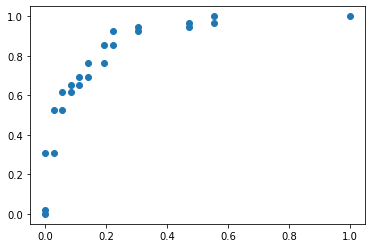

In [37]:
import matplotlib.pyplot as plt
plt.scatter(fpr, tpr)
plt.show()

In [20]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(Y_teste, probs))

0.9035353535353535


In [27]:
print(tpr[14], fpr[14], thresholds[14])

0.8545454545454545 0.19444444444444445 0.6044124976364318
